# 8. Dataframes: Merging 

In [1]:
import pandas as pd

### Table of Contents


1. The pd.concat Function I
2. The pd.concat Function II
3. Left Joins
4. The left_on and right_on Parameters
5. Inner Joins I
6. Inner Joins II
7. Full/Outer Join
8. Merging by Indexes with the left_index and right_index Parameters
9. The join Method



## Our Dataset

- Our datasets are spread across multiple files in this section. Each file has a `restaurant_` prefix.
- The `customers.csv` file stores our restaurant's customers.
- The `foods.csv` file stores our restaurant's menu items.
- The `week_1_sales` and `week_2_sales` files store our orders.


In [2]:
foods = pd.read_csv("restaurant_foods.csv") # food in our restaurant
foods.head()

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


In [3]:
customers = pd.read_csv("restaurant_customers.csv") # customers that visited our restaurant
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [4]:
week1 = pd.read_csv("restaurant_week_1_sales.csv") # what food which customer consumed in week 1
week1 # link between foods and customers Df ('Foreign Key' in relational databases)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [5]:
week2 = pd.read_csv("restaurant_week_2_sales.csv") # same for week 2
week2

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


## 1. The `pd.concat` Function I

- The `concat` function concatenates one **DataFrame** to the end of another.
- The original index labels will be kept by default. Set `ignore_index` to `True` to generate a new index.
- The `keys` parameter creates a **MultiIndex** using the specified keys/labels.


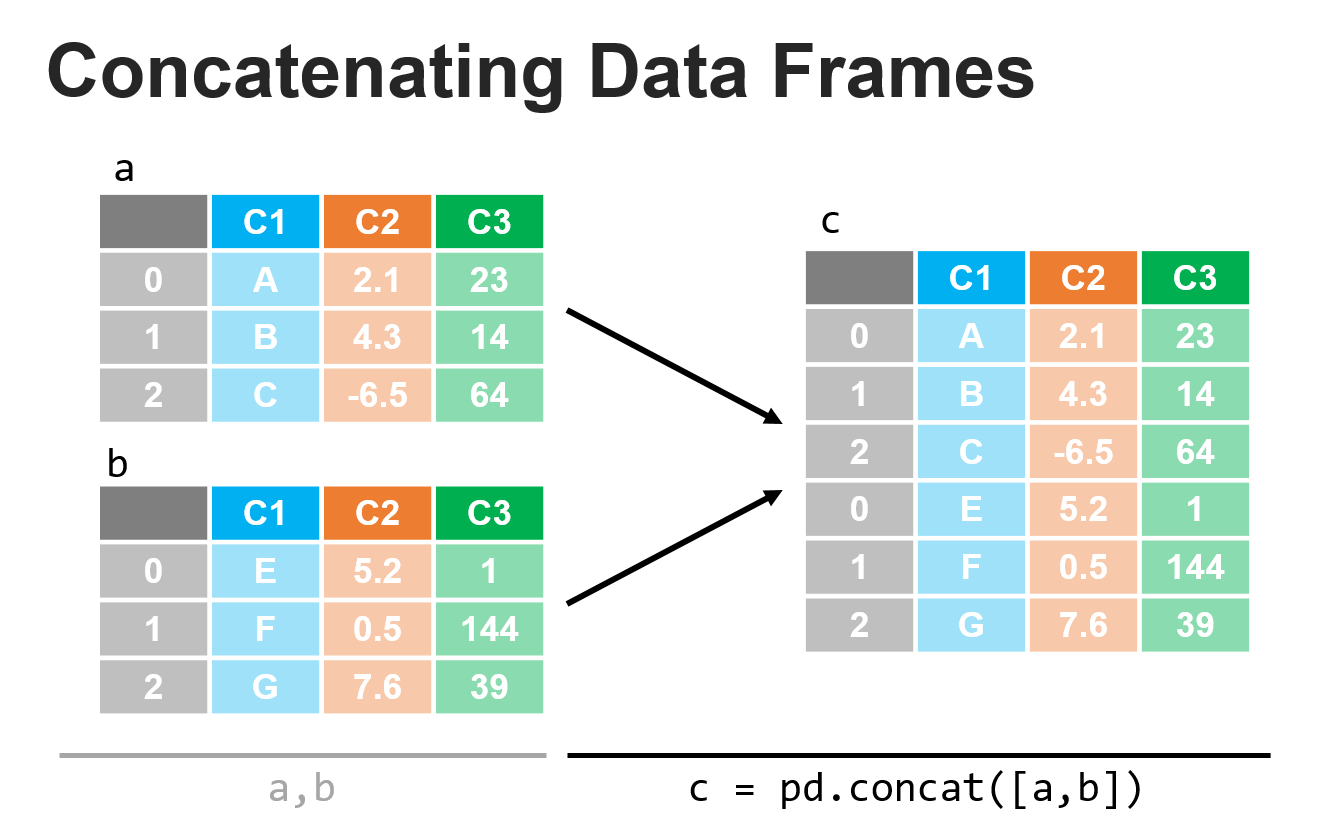

    Source: https://www.practicaldatascience.org/_images/3.2.30-pandas_dataframe_concat.png

In [6]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [7]:
# to capture sales of 2 weeks together: simply concatenate week1 and week2 Df

pd.concat([week1, week2]) # concat() function is a top-level function of Pandas, which we can call on pd;
# pass in not 2 arguments, but just 1, by putting Dataframes you want to concatenate inside a list
# Pandas simply adds one Df below other Df in order in which they are listed: we have 500 rows, but index has remained the same
# so, we have 2x index from 0-249 one below the other (index label does not have to be unique in Pandas, so possible; implicitly each row will have an individual index number)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [8]:
# if we want index to be adjusted we can set 'ignore_index'-parameter to True
# the original labels are ignored, new labels given`

pd.concat([week1,week2],ignore_index=True)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [9]:
# if we want to keep original index labels, and on top of that be able to identify to which Df this index label belonged originally
# we set ignore_index to default False value again, and we provide identifiers for both original Dataframes in keys parameter
# in practice, this means we make MultiIndex object with 2 layers/levels

pd.concat([week1,week2],ignore_index=False,keys=["Week 1","Week 2"])

Customer ID  Food ID
Week 1 0            537        9
       1             97        4
       2            658        1
       3            202        2
       4            155        9
...                 ...      ...
Week 2 245          783       10
       246          556       10
       247          547        9
       248          252        9
       249          249        6

[500 rows x 2 columns]

## 2. The `pd.concat` Function II

- Pandas will concatenate the **DataFrames** along the row/index axis.
- Pandas will include all columns that exist in either **DataFrame**. If there are no matching values, pandas will use `NaN` values.
- We can pass the `axis` parameter an argument of `"columns"` to concatenate on the column axis.


In [10]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [11]:
# if columns do not have matching column names in both Dfs
# you can rename columns before calling concat() function

# let's make two Dfs with different column names from scratch:

df1 = pd.DataFrame([1,2,3], columns=["A"])
df1

,A
0,1
1,2
2,3


In [12]:
df2 = pd.DataFrame([4,5,6], columns=["B"])
df2

,B
0,4
1,5
2,6


In [13]:
pd.concat([df1,df2]) # pd.concat() will concat df1 to df2
# if columns in two Dfs do not match, Pandas will still concatenate them vertically
# but think they are different columns
# missing values for a column in either Df are filled in with NaN

,A,B
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
0,NaN,4.0
1,NaN,5.0
2,NaN,6.0


In [14]:
# what if we would not concatenate vertically, by row, but horizontally, by column?
pd.concat([df1,df2], axis = 1) # we change default value for parameter axis=0 / axis="index" to axis=1 / axis="columns"

,A,B
0,1,4
1,2,5
2,3,6


In [15]:
# now Pandas did find common row index labels, and can concatenate df1 and df2 without NaN values

## 3. Left Joins

- The `merge` method joins two **DataFrames** together based on shared values in a column or an index.
- A left join merges one **DataFrame** into another based on values in the first one.
- The "left" **DataFrame** is the one we invoke the `merge` method on.
- If the left **DataFrame**'s value is not found in the right **DataFrame**, the row will hold `NaN` values.


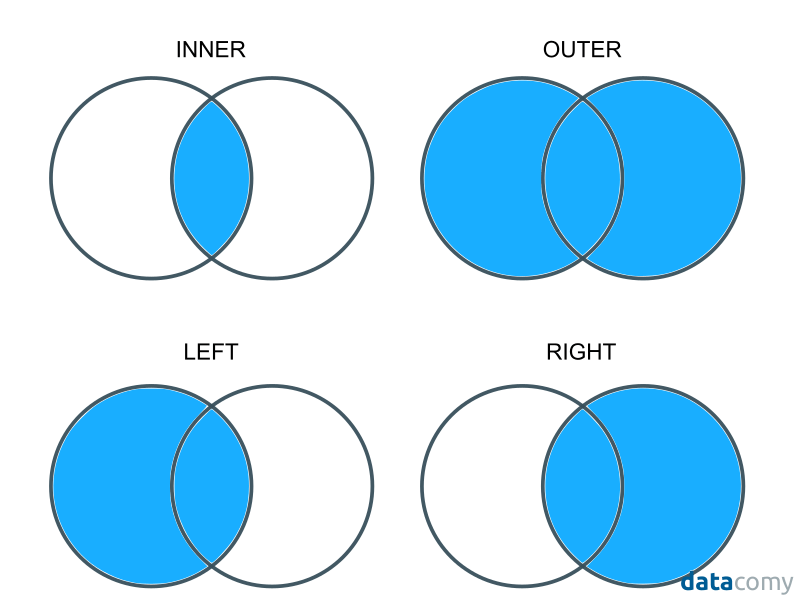

    Source: https://datacomy.com/data_analysis/pandas/merge/types-of-joins.png

In [16]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [17]:
# we want to combine Df on week1 with Df on food & food price
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [18]:
foods.head()

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49


In [19]:
# left Df in this case is week1

pd.merge(week1,foods)

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


In [20]:
# also possible
week1.merge(foods,how="left",on="Food ID")

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


## 4. The left_on and right_on Parameters

- The `left_on` and `right_on` parameters designate the column names from each **DataFrame** to use in the merge.


In [21]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [22]:
# in former example with left join between week1 and foods both Df had same column names
# in this example with left join between week2 and customers this is not the case
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [23]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [24]:
# we can rename one of the columns
# or we can use left_on & right_on parameters that state which columns to match on in both Df

# again: method 1
pd.merge(week2,customers,left_on = "Customer ID", right_on="ID")

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...,...
245,783,10,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,556,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,547,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,252,Douglas,Powell,Male,Jetwire,Geologist IV


In [25]:
# or method 2:

week2.merge(customers,how="left",left_on = "Customer ID", right_on="ID") # we cannot use 'on' parameter because no common column


,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...,...
245,783,10,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,556,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,547,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,252,Douglas,Powell,Male,Jetwire,Geologist IV


In [26]:
# we see that in this case, ID columns of both Dfs are retained
# to remove one of these, we can use drop method

week2.merge(customers,how="left",left_on = "Customer ID", right_on="ID").drop("ID",axis=1)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,Roger,Gordon,Male,Skilith,Operator
4,267,3,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...
245,783,10,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,Douglas,Powell,Male,Jetwire,Geologist IV


# 5. Inner Joins I

- Inner joins merge two tables based on shared/common values in columns.
- If only one **DataFrame** has a value, pandas will exclude it from the final results set.
- If the same ID occurs multiple times, pandas will store each possible combination of the values.
- The design of the join ensures that the results will be the same no matter what **DataFrame** the `merge` method is invoked upon.


In [27]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [28]:
# merge week1 and week2 Df

week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [29]:
week2.head()

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3


In [30]:
# we want to find customers that came in both week 1 and week 2

week1.merge(week2, how= "inner",on="Customer ID")

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,503,5,8
3,503,5,9
4,155,1,3
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [31]:
# because both Dfs have the Food_ID, Pandas names one Food_ID_x & other  Food_ID_y
# if you want to customize, you can use parameter 'suffixes'

week1.merge(week2, how= "inner",on="Customer ID",suffixes=[" - week 1", " - week 2"])

,Customer ID,Food ID - week 1,Food ID - week 2
0,537,9,5
1,155,9,3
2,503,5,8
3,503,5,9
4,155,1,3
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


## 6. Inner Joins II

- We can pass multiple arguments to the `on` parameter of the `merge` method. Pandas will require matches in both columns across the **DataFrames**.


In [32]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [33]:
# if we want to not only want to find customers who came both weeks AND bought same food item
# we can pass in a list for 'on' parameter for the inner join

week1.merge(week2, how= "inner",on=["Customer ID","Food ID"],suffixes=[" - week 1", " - week 2"])

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3
4,21,4
5,922,1
6,21,4
7,578,5
8,578,5


## 7. Full/Outer Join

- A **full/outer** join joins values that are found in either **DataFrame** or both **DataFrames**.
- Pandas does not mind if a value exists in one **DataFrame** but not the other.
- If a value does not exist in one **DataFrame**, it will have a `NaN`.


In [34]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv")
customers = pd.read_csv("restaurant_customers.csv")
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [35]:
week1.merge(week2,how="outer",on="Customer ID")

,Customer ID,Food ID_x,Food ID_y
0,3,2.0,NaN
1,8,NaN,6.0
2,10,2.0,NaN
3,13,NaN,2.0
4,20,1.0,NaN
...,...,...,...
449,985,5.0,NaN
450,991,2.0,NaN
451,994,NaN,2.0
452,996,NaN,10.0


In [36]:
# again we can customize column titles
week1.merge(week2, how= "outer",on="Customer ID",suffixes=[" - week 1", " - week 2"])

,Customer ID,Food ID - week 1,Food ID - week 2
0,3,2.0,NaN
1,8,NaN,6.0
2,10,2.0,NaN
3,13,NaN,2.0
4,20,1.0,NaN
...,...,...,...
449,985,5.0,NaN
450,991,2.0,NaN
451,994,NaN,2.0
452,996,NaN,10.0


In [37]:
# we can also add a new column telling us whether there was a join and if so: which
week1.merge(week2, how= "outer",on="Customer ID",suffixes=[" - week 1", " - week 2"],indicator=True)

,Customer ID,Food ID - week 1,Food ID - week 2,_merge
0,3,2.0,NaN,left_only
1,8,NaN,6.0,right_only
2,10,2.0,NaN,left_only
3,13,NaN,2.0,right_only
4,20,1.0,NaN,left_only
...,...,...,...,...
449,985,5.0,NaN,left_only
450,991,2.0,NaN,left_only
451,994,NaN,2.0,right_only
452,996,NaN,10.0,right_only


In [38]:
# we can now you use this new column _merge to do filter operations
merged = week1.merge(week2, how= "outer",on="Customer ID",suffixes=[" - week 1", " - week 2"],indicator=True)
merged["_merge"].value_counts()

_merge
right_only    197
left_only     195
both           62
Name: count, dtype: int64

In [39]:
# we can select only left and right joins
merged[merged["_merge"].isin(["left_only","right_only"])]

,Customer ID,Food ID - week 1,Food ID - week 2,_merge
0,3,2.0,NaN,left_only
1,8,NaN,6.0,right_only
2,10,2.0,NaN,left_only
3,13,NaN,2.0,right_only
4,20,1.0,NaN,left_only
...,...,...,...,...
449,985,5.0,NaN,left_only
450,991,2.0,NaN,left_only
451,994,NaN,2.0,right_only
452,996,NaN,10.0,right_only


## 8. Merging by Indexes with the left_index and right_index Parameters

- Use the `on` parameter if the column(s) to be matched on have the same names in both **DataFrames**.
- Use the `left_on` and `right_on` parameters if the column(s) to be matched on have different names in the two **DataFrames**.
- Use the `left_index` or `right_index` parameters (set to `True`) if the values to be matched on are found in the index of a **DataFrame**.


In [40]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv", index_col="Food ID") # set column Food ID as index label
customers = pd.read_csv("restaurant_customers.csv",index_col="ID") # set column ID as index label
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")

In [41]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [42]:
customers.head()

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive
4,Steven,Evans,Male,Fatz,Registered Nurse
5,Judy,Morrison,Female,Demivee,Legal Assistant


In [43]:
# we want to do a left join on week1 Df, but:
# in left Df we have COLUMN with values we care about --> use 'left_on' to specify column
# while in right Df we have INDEX with values we care about --> use 'right_index to specify index

week1.merge(customers, how="left",left_on="Customer ID",right_index = True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer


In [44]:
# we can now also join the foods Df with the same logic, by just chaining methods:

week1.merge(
    customers, how="left",left_on="Customer ID",right_index = True
).merge(foods, how="left",left_on="Food ID",right_index = True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99
...,...,...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer,Donut,0.99
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant,Pasta,13.99
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor,Taco,2.99
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer,Pasta,13.99


## 9. The join Method

- The `join` method is a shortcut for concatenating two **DataFrames** when merging by index labels.


In [45]:
# load datasets

foods = pd.read_csv("restaurant_foods.csv", index_col="Food ID") # set column Food ID as index label
customers = pd.read_csv("restaurant_customers.csv",index_col="ID") # set column ID as index label
week1 = pd.read_csv("restaurant_week_1_sales.csv")
week2 = pd.read_csv("restaurant_week_2_sales.csv")
satisfaction = pd.read_csv("restaurant_week_1_satisfaction.csv") # we introduce new dataset: simply a Rating of our restaurant

In [46]:
satisfaction

,Satisfaction Rating
0,2
1,7
2,3
3,7
4,10
...,...
245,1
246,2
247,8
248,10


In [47]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [48]:
# if index labels of both Dfs, satisfaction & week1, refer to the same case
# we can use merge & specify we join on index labels:

week1.merge(satisfaction,how="left",left_index=True,right_index=True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [49]:
# as a shortcut we can also use join:

week1.join(satisfaction)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10
